In [1]:
from tensorflow import keras

from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,Sequential
from glob import glob
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img

import matplotlib.pyplot as plt

In [3]:
##Preprocessing the data
Image_size = [224,224]

train_path = 'Datasets/Train'
test_path = 'Datasets/Test'

In [6]:
a= glob('Datasets/Train/*')
len(a)

10

In [7]:
##Image Data Generator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255)

In [8]:
training_set = train_datagen.flow_from_directory(train_path,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

Found 600 images belonging to 10 classes.


In [9]:
test_set = test_datagen.flow_from_directory(test_path,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical") 

Found 100 images belonging to 10 classes.


In [10]:
##Creating the DL Model
from keras import layers
model = Sequential()

model.add(Conv2D(filters = 32,strides=1,padding="valid",kernel_size=(3,3),activation="relu",input_shape = (224,224,3)))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64,strides=1,padding="valid",kernel_size=(3,3),activation="relu"))
model.add(Dropout(0.4))
model.add(MaxPooling2D(2,2))


model.add(Flatten())
model.add(Dense(300,activation = "relu"))
model.add(Dense(100,activation = "relu"))

model.add(Dense(10,activation = "softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
dropout (Dropout)            (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0

In [12]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = "accuracy")

In [11]:
##Fit the Model

history = model.fit(training_set,epochs = 30,steps_per_epoch = len(training_set),validation_data = test_set,
                   validation_steps = len(test_set))

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


19/19 [==============================] - 255s 12s/step - loss: 16.3226 - accuracy: 0.1514 - val_loss: 2.2828 - val_accuracy: 0.1100
Epoch 2/30
19/19 [==============================] - 25s 1s/step - loss: 2.2742 - accuracy: 0.1297 - val_loss: 2.2427 - val_accuracy: 0.2300
Epoch 3/30
19/19 [==============================] - 25s 1s/step - loss: 2.1864 - accuracy: 0.1628 - val_loss: 2.1770 - val_accuracy: 0.2900
Epoch 4/30
19/19 [==============================] - 24s 1s/step - loss: 2.1168 - accuracy: 0.2289 - val_loss: 2.1006 - val_accuracy: 0.4000
Epoch 5/30
19/19 [==============================] - 25s 1s/step - loss: 2.0054 - accuracy: 0.3333 - val_loss: 1.9696 - val_accuracy: 0.4300
Epoch 6/30
19/19 [==============================] - 24s 1s/step - loss: 1.8128 - accuracy: 0.3936 - val_loss: 1.6979 - val_accuracy: 0.5200
Epoch 7/30
19/19 [==============================] - 24s 1s/step - loss: 1.7488 - accuracy: 0.3955 - val_loss: 1.6075 - val_accuracy: 0.5300
Epoch 8/30
19/19 [==========

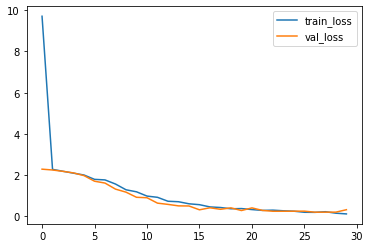

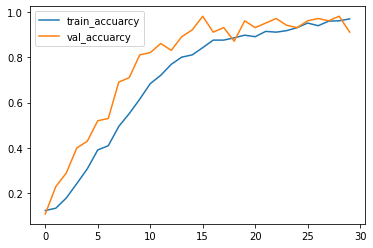

In [14]:
#Plot the Loss
plt.plot(history.history["loss"],label = "train_loss")
plt.plot(history.history["val_loss"],label = "val_loss")
plt.legend()
plt.show()

#Plot the Accuracy
plt.plot(history.history["accuracy"],label = "train_accuarcy")
plt.plot(history.history["val_accuracy"],label = "val_accuarcy")
plt.legend()
plt.show()

In [15]:
model.save("models/base_model.h5")

In [16]:
from keras.models import load_model

In [19]:
base = load_model("models/base_model.h5")

In [20]:
from keras.preprocessing import image

In [21]:
##Get one test image

img = load_img("Datasets/Test/audi/audi_1.jpeg",target_size = (224,224))

In [34]:
y_pred = base.predict(test_set)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
y_pred

In [36]:
import numpy as np
y_pred = np.argmax(y_pred,axis = 1)

In [37]:
y_pred

array([0, 7, 4, 0, 1, 6, 4, 2, 3, 2, 9, 0, 9, 3, 2, 3, 2, 4, 4, 8, 2, 6,
       8, 0, 5, 4, 6, 5, 2, 2, 8, 1, 5, 7, 1, 7, 7, 3, 9, 8, 7, 3, 7, 5,
       4, 4, 0, 5, 0, 4, 0, 0, 9, 6, 8, 7, 6, 5, 0, 5, 6, 5, 1, 2, 9, 4,
       3, 2, 1, 6, 2, 8, 2, 5, 1, 6, 5, 7, 7, 1, 0, 5, 9, 1, 3, 2, 5, 3,
       2, 0, 5, 6, 6, 8, 8, 9, 4, 9, 2, 2])

In [38]:
len(y_pred)

100

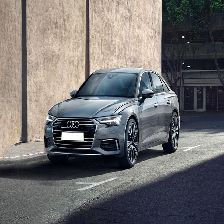

In [39]:
img

In [41]:
img_data = image.img_to_array(img)

In [43]:
img_data.shape

(224, 224, 3)

In [45]:
img_data = np.expand_dims(img_data,axis = 0)

In [47]:
img_data.shape

(1, 224, 224, 3)

In [48]:
base.predict(img_data)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [49]:
np.argmax(base.predict(img_data),axis = 1)

array([2])